Problem statement: To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

### Importing Skin Cancer Data
#### To do: Take necessary actions to read the data

### Importing all the important libraries

In [ ]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [ ]:
## If you are using the data by mounting the google drive, use the following :
from google.colab import drive
drive.mount('/content/drive/')

##Ref:https://towardsdatascience.com/downloading-datasets-into-google-drive-via-google-colab-bcb1b30b0166


Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
# loading the data from the local
train_path = '/content/drive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/'
test_path = '/content/drive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Test/'

In [ ]:
# Defining the path for train and test images
data_dir_train = pathlib.Path("/content/drive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train")
data_dir_test  = pathlib.Path("/content/drive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Test")


This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [ ]:
# printing the number of images available in test and training dataset
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(f'Image count in training dataset {image_count_train}')
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(f'Image count in testing dataset {image_count_test}')

Image count in training dataset 2257
Image count in testing dataset 118


In [ ]:
#list directory in train folder
dir_train = os.listdir(data_dir_train)
dir_train.sort()
dir_train

['actinic keratosis',
 'basal cell carcinoma',
 'dermatofibroma',
 'melanoma',
 'nevus',
 'pigmented benign keratosis',
 'seborrheic keratosis',
 'squamous cell carcinoma',
 'vascular lesion']

In [ ]:
#list dir in test folder
dir_test = os.listdir(data_dir_test)
dir_test.sort()
dir_test

['actinic keratosis',
 'basal cell carcinoma',
 'dermatofibroma',
 'melanoma',
 'nevus',
 'pigmented benign keratosis',
 'seborrheic keratosis',
 'squamous cell carcinoma',
 'vascular lesion']

### Load using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.

### Create a dataset

Define some parameters for the loader:

In [ ]:
batch_size = 32
img_height = 180
img_width = 180

Use 80% of the images for training, and 20% for validation.

In [ ]:
## Write your train dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    labels="inferred",
    label_mode="int",
    class_names=None,
    color_mode="rgb",
    batch_size=batch_size,
    image_size=(img_height, img_width),
    shuffle=True,
    seed=123,
    validation_split=0.2,
    subset="training",
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 2257 files belonging to 9 classes.
Using 1806 files for training.


In [ ]:
## Write your validation dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
# ## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    labels="inferred",
    label_mode="int",
    class_names=None,
    color_mode="rgb",
    batch_size=batch_size,
    image_size=(img_height, img_width),
    shuffle=True,
    seed=123,
    validation_split=0.2,
    subset="validation",
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 2257 files belonging to 9 classes.
Using 451 files for validation.


In [ ]:
# List out all the classes of skin cancer and store them in a list.
# You can find the class names in the class_names attribute on these datasets.
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


### Visualize the data
#### Todo, create a code to visualize one instance of all the nine classes present in the dataset

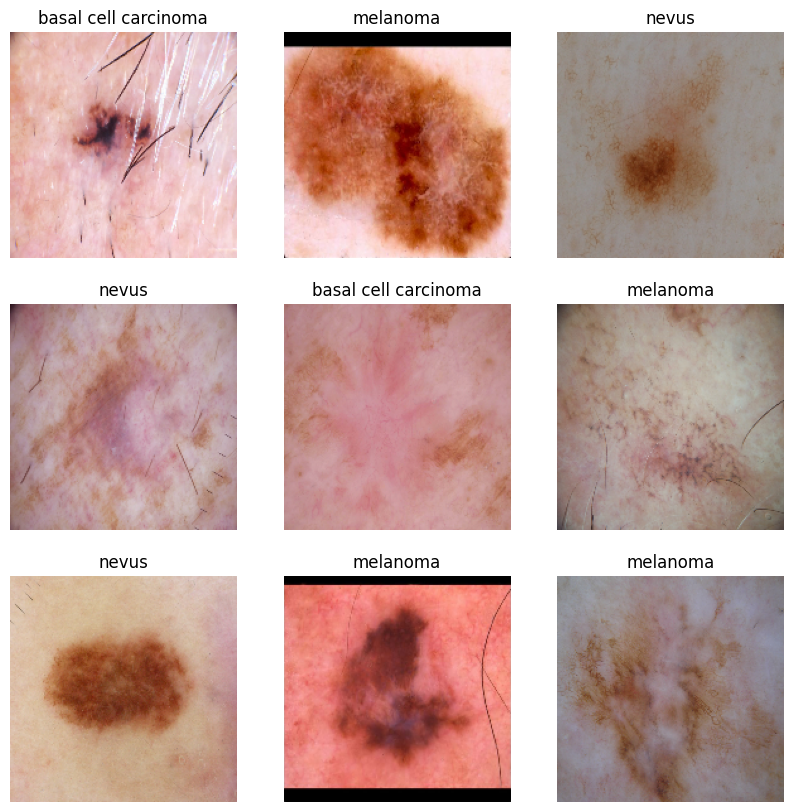

In [ ]:
import matplotlib.pyplot as plt

# Ploting the 9 types of skin cancer
# setting the output figure size
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [ ]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Create the model
#### Todo: Create a CNN model, which can accurately detect 9 classes present in the dataset. Use ```layers.experimental.preprocessing.Rescaling``` to normalize pixel values between (0,1). The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network. Here, it is good to standardize values to be in the `[0, 1]`

In [ ]:
#Standardize Data of RGB channel value
# normalization_layer = layers.Rescaling(1./255)
normalization_layer = tf.keras.layers.experimental.preprocessing.Rescaling(1./255)
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))


0.01699147 0.7383985


In [ ]:
# getting the number of classes in the dataset
num_classes = len(class_names)

# building the model with keras Sequential with relu as activation function
model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

### Compile the model
Choose an appropirate optimiser and loss function for model training

In [ ]:
#using adam for optimizer and SparseCategoricalCrossentropy as loss function to compute crossentropy loss
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
# View the summary of all layers
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 90, 90, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 45, 45, 64)        1

### Train the model

In [ ]:
# Training the model with epochs as 20
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
57/57 [==============================] - 54s 759ms/step - loss: 2.0335 - accuracy: 0.2364 - val_loss: 1.8669 - val_accuracy: 0.3636
Epoch 2/20
57/57 [==============================] - 1s 21ms/step - loss: 1.8570 - accuracy: 0.3339 - val_loss: 1.6991 - val_accuracy: 0.3836
Epoch 3/20
57/57 [==============================] - 1s 20ms/step - loss: 1.6582 - accuracy: 0.3898 - val_loss: 1.5725 - val_accuracy: 0.4257
Epoch 4/20
57/57 [==============================] - 1s 20ms/step - loss: 1.5234 - accuracy: 0.4601 - val_loss: 1.4934 - val_accuracy: 0.4523
Epoch 5/20
57/57 [==============================] - 1s 20ms/step - loss: 1.3602 - accuracy: 0.5321 - val_loss: 1.5448 - val_accuracy: 0.4412
Epoch 6/20
57/57 [==============================] - 1s 20ms/step - loss: 1.3368 - accuracy: 0.5277 - val_loss: 1.4925 - val_accuracy: 0.4656
Epoch 7/20
57/57 [==============================] - 1s 22ms/step - loss: 1.2224 - accuracy: 0.5725 - val_loss: 1.6659 - val_accuracy: 0.4324
Epoch 8/20


We can observe that,

  Training Loss       : ~0.44
  Validation Loss     : 2.19
  Training Accuracy   : ~0.83
  Validation Accuracy : 0.47

We can see that there is a significant increase in accuracy for Training data and accuracy for validation data is very less 47%. This shows Overfitting where the Training accuracy is high 83% and validation data has accuracy of 47%.

### Visualizing training results

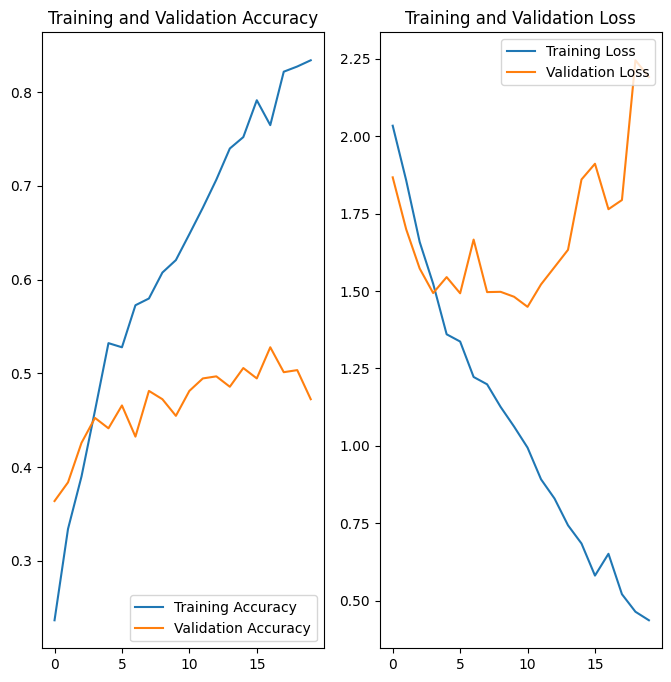

In [ ]:
# storing model accuracy in acc
acc = history.history['accuracy']
# storing model vavalidation accuracy in val_acc
val_acc = history.history['val_accuracy']
# storing the model loss in loss variable
loss = history.history['loss']
# storing validation loss of model in val_loss variable
val_loss = history.history['val_loss']

# taking the range using the epochs
epochs_range = range(epochs)

# setting the output figure size
plt.figure(figsize=(8, 8))
# plotting the training and validation accuracy in 1st plot
# setting the properties for the 1st image in the output image
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
# setting the legend possition in the image
plt.legend(loc='lower right')
# setting the image title
plt.title('Training and Validation Accuracy')

# plotting the training and validation loss in 2nd plot
# setting the properties for the 2nd image in the output image
plt.subplot(1, 2, 2)

plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
# setting the legend possition in the image
plt.legend(loc='upper right')
# setting the image title
plt.title('Training and Validation Loss')
# printing the plot
plt.show()

Observations
Training dataset accuracy shows a higher value and increases significantly.
Validation dataset accuracy shows a lower value.
Based on above findings, we can say that the model is overfitting

In [ ]:
# As the model is overfitting, lets due the agumentation to reduce the overfitting
# Let's use random flip, rotate and zoom for agumentation
data_augmentation = keras.Sequential([
    layers.RandomFlip("horizontal",input_shape=(img_height,img_width,3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1)])

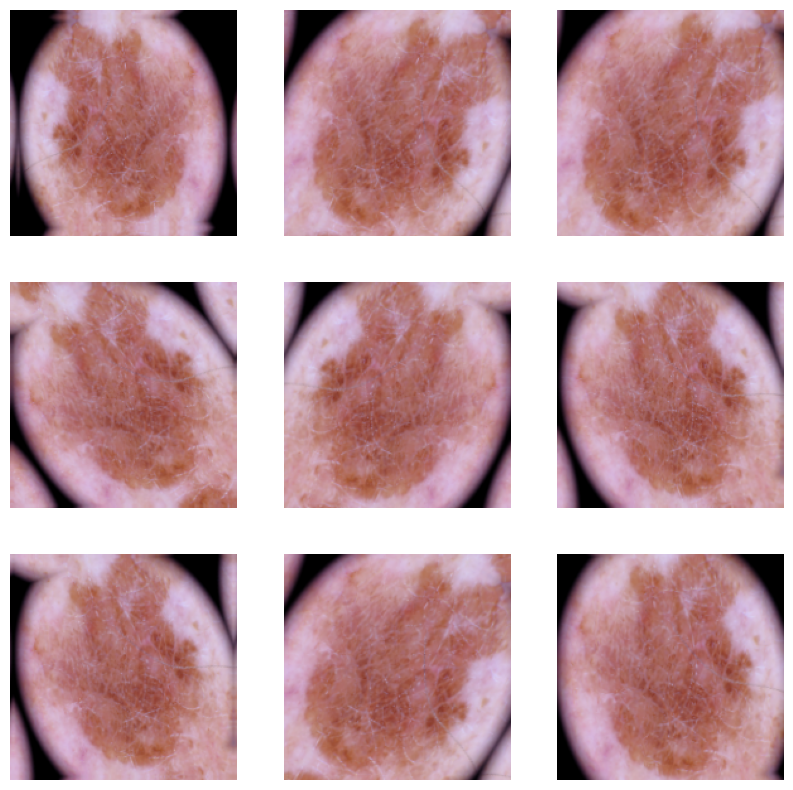

In [ ]:
#visualize how your augmentation strategy works for one instance of training image.
# setting the output image size
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

### Todo:
### Create the model, compile and train the model


In [ ]:
## You can use Dropout layer if there is an evidence of overfitting in your findings
# Let's add some dropout layers to the model as our model is overfitting
model = Sequential([
  data_augmentation,
  layers.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])



### Compiling the model

In [ ]:
## compiling the model with adam optinizer and crossentropy for loss function and accuracy as metrics
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
# printing the model summary
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_1 (Sequential)   (None, 180, 180, 3)       0         
                                                                 
 rescaling_2 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 90, 90, 16)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                  

### Training the model

In [ ]:
## Your code goes here, note: train your model for 20 epochs
# We are not changing the epochs count for the second model
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
57/57 [==============================] - 4s 37ms/step - loss: 2.0795 - accuracy: 0.2126 - val_loss: 1.9984 - val_accuracy: 0.2328
Epoch 2/20
57/57 [==============================] - 2s 31ms/step - loss: 1.8054 - accuracy: 0.3400 - val_loss: 1.6689 - val_accuracy: 0.3947
Epoch 3/20
57/57 [==============================] - 2s 30ms/step - loss: 1.5891 - accuracy: 0.4413 - val_loss: 1.5268 - val_accuracy: 0.4634
Epoch 4/20
57/57 [==============================] - 2s 29ms/step - loss: 1.4283 - accuracy: 0.5033 - val_loss: 1.5110 - val_accuracy: 0.4612
Epoch 5/20
57/57 [==============================] - 2s 29ms/step - loss: 1.4137 - accuracy: 0.5089 - val_loss: 1.4843 - val_accuracy: 0.4745
Epoch 6/20
57/57 [==============================] - 2s 30ms/step - loss: 1.3929 - accuracy: 0.5116 - val_loss: 1.4856 - val_accuracy: 0.4568
Epoch 7/20
57/57 [==============================] - 2s 32ms/step - loss: 1.3110 - accuracy: 0.5415 - val_loss: 1.5697 - val_accuracy: 0.4191
Epoch 8/20
57

We can observe that,

  Training Loss       : ~1.04
  Validation Loss     : 1.3
  Training Accuracy   : ~63%
  Validation Accuracy : ~52%

### Visualizing the results

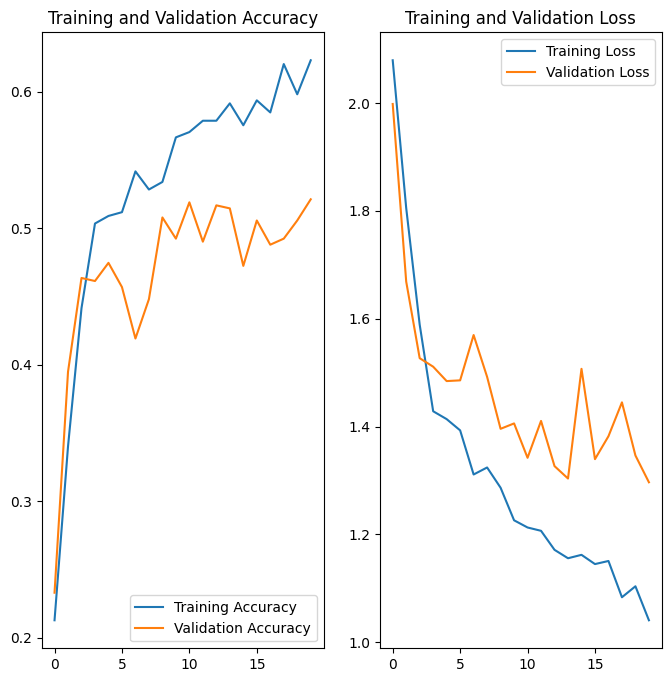

In [ ]:
# storing model accuracy in acc
acc = history.history['accuracy']
# storing model vavalidation accuracy in val_acc
val_acc = history.history['val_accuracy']
# storing the model loss in loss variable
loss = history.history['loss']
# storing validation loss of model in val_loss variable
val_loss = history.history['val_loss']

# taking the range using the epochs
epochs_range = range(epochs)

# setting the output figure size
plt.figure(figsize=(8, 8))
# plotting the training and validation accuracy in 1st plot
# setting the properties for the 1st image in the output image
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
# setting the legend possition in the image
plt.legend(loc='lower right')
# setting the image title
plt.title('Training and Validation Accuracy')

# plotting the training and validation loss in 2nd plot
# setting the properties for the 2nd image in the output image
plt.subplot(1, 2, 2)

plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
# setting the legend possition in the image
plt.legend(loc='upper right')
# setting the image title
plt.title('Training and Validation Loss')
# printing the plot
plt.show()

#### Findings
Training dataset accuracy is not very high
Validation dataset accuracy also not very high
There is not much difference in the Training and validation accuracy.


#### **Todo:** Find the distribution of classes in the training dataset.
#### **Context:** Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

<Figure size 1000x1000 with 0 Axes>

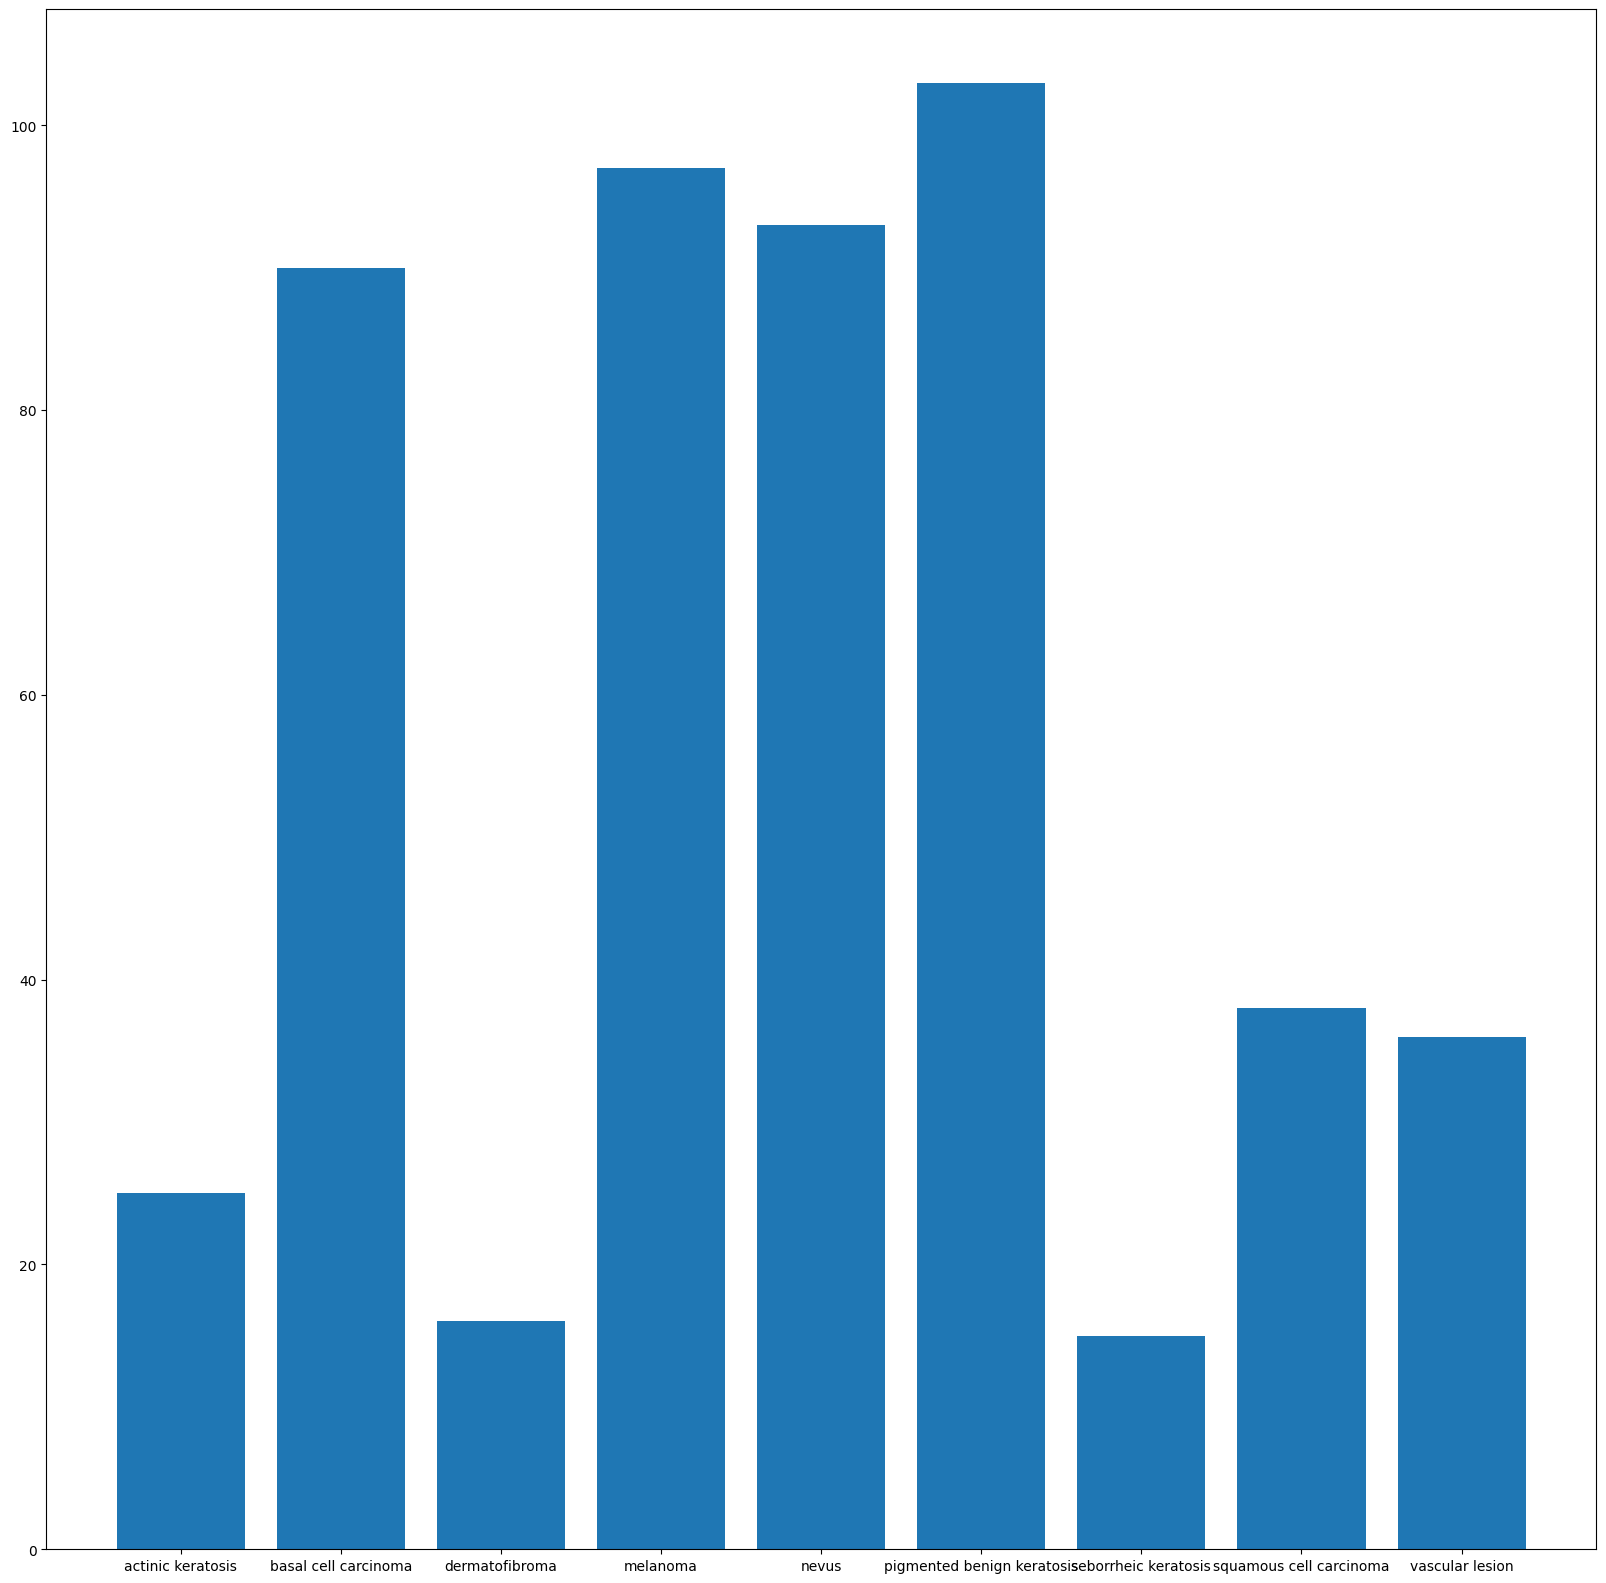

In [ ]:
# Let's check on the Class Imbalance if Present
# taking empty dictionary
class_data = dict()

# adding the empty lists for each class record in the dictionary
for i in class_names:
  class_data[i] = []

# setting the output image size
plt.figure(figsize=(10, 10))
# adding the images into the data dictionary for each class
for images, labels in train_ds:
  for i in range(9):
    class_data[class_names[labels[i]]].append(images[i].numpy().astype("uint8"))
# storing the number of images for specific class
for i in class_data:
  # getting the length and storing the dictionary
  class_data[i] = len(class_data[i])

f = plt.figure()
f.set_figwidth(20)
f.set_figheight(20)
# printing the plot
plt.bar(range(len(class_data)), list(class_data.values()), align='center')
plt.xticks(range(len(class_data)), list(class_data.keys()))
plt.show()

#### **Todo:** Write your findings here:
Findings
Seborrheic keratosis have less data compare to remaining classes
Pigmented Benign Keratosis classes have more records in the dataset compare to other classes


#### **Todo:** Rectify the class imbalance
#### **Context:** You can use a python package known as `Augmentor` (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

In [ ]:
!pip install Augmentor

To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


In [ ]:
# importing the agumentor package
import Augmentor

# taking the Training dataset path
# path_to_training_dataset='gdrive/My Drive/Colab Notebooks/Skin cancer ISIC The International Skin Imaging Collaboration/Train/'

for i in class_names:
  # instantiating the pipeline object with training dataset for a specific class
  #train_path
    p = Augmentor.Pipeline(train_path + i)
    # rotating the image
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    # We are adding 500 samples per class to make sure that none of the classes are sparse.
    p.sample(500)

Initialised with 114 image(s) found.
Output directory set to /content/drive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F3F4436C940>: 100%|██████████| 500/500 [00:21<00:00, 23.30 Samples/s]


Initialised with 376 image(s) found.
Output directory set to /content/drive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/basal cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F3F47A5D810>: 100%|██████████| 500/500 [00:22<00:00, 22.54 Samples/s]


Initialised with 95 image(s) found.
Output directory set to /content/drive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/dermatofibroma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F3EB6467D00>: 100%|██████████| 500/500 [00:21<00:00, 23.10 Samples/s]


Initialised with 448 image(s) found.
Output directory set to /content/drive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7F3FD1075930>: 100%|██████████| 500/500 [01:59<00:00,  4.18 Samples/s]


Initialised with 357 image(s) found.
Output directory set to /content/drive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/nevus/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F3EB7EE2830>: 100%|██████████| 500/500 [01:41<00:00,  4.91 Samples/s]


Initialised with 470 image(s) found.
Output directory set to /content/drive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/pigmented benign keratosis/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7F3F44211DB0>: 100%|██████████| 500/500 [00:22<00:00, 21.98 Samples/s]


Initialised with 77 image(s) found.
Output directory set to /content/drive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/seborrheic keratosis/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1024x768 at 0x7F3F44429570>: 100%|██████████| 500/500 [00:48<00:00, 10.30 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/drive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/squamous cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F3F4414A020>: 100%|██████████| 500/500 [00:22<00:00, 21.81 Samples/s]


Initialised with 139 image(s) found.
Output directory set to /content/drive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/vascular lesion/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7F3F44211D20>: 100%|██████████| 500/500 [00:21<00:00, 23.12 Samples/s]


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [ ]:
# again printing the image count in training dataset
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(f'Number of images in training dataset: {image_count_train}')

Number of images in training dataset: 4500


### Lets see the distribution of augmented data after adding new images to the original training data.

In [ ]:
# importing glob to find files recursively
from glob import glob

In [ ]:
# generating path list
path_list = [x for x in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
len(path_list)

4500

In [ ]:
# taking the skin cancer type in a list
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
len(lesion_list_new)

4500

In [ ]:
# creating a new dictionary with the file path and class type
dataframe_dict_new = dict(zip(path_list, lesion_list_new))

In [ ]:
# creating a dataframe with the above dictionary
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])
new_df = df2
# new_df = original_df.append(df2)

In [ ]:
# printing the number of images under each type
new_df['Label'].value_counts()

nevus                         500
basal cell carcinoma          500
pigmented benign keratosis    500
squamous cell carcinoma       500
melanoma                      500
vascular lesion               500
seborrheic keratosis          500
dermatofibroma                500
actinic keratosis             500
Name: Label, dtype: int64

So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

#### **Todo**: Train the model on the data created using Augmentor

In [ ]:
batch_size = 32
img_height = 180
img_width = 180

#### **Todo:** Create a training dataset

In [ ]:
# creating the training dataset to training the model
# data_dir_train='gdrive/My Drive/Colab Notebooks/Skin cancer ISIC The International Skin Imaging Collaboration/Train/'
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'training',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6757 files belonging to 9 classes.
Using 5406 files for training.


#### **Todo:** Create a validation dataset

In [ ]:
# creating validation dataset to check the model
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'validation',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6757 files belonging to 9 classes.
Using 1351 files for validation.


#### **Todo:** Create your model (make sure to include normalization)

In [ ]:
# performing autotune
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

#normalizing the Data
normalization_layer = tf.keras.layers.experimental.preprocessing.Rescaling(1./255)
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

# creating a model post handling the imbalancing
model = Sequential([
  data_augmentation,
  layers.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

0.16617648 0.8656863


#### **Todo:** Compile your model (Choose optimizer and loss function appropriately)

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_1 (Sequential)   (None, 180, 180, 3)       0         
                                                                 
 rescaling_4 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_6 (Conv2D)           (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 90, 90, 16)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                  

#### **Todo:**  Train your model

In [ ]:
# lets train the model with 30 epochs
epochs = 30
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/30
169/169 [==============================] - 16s 80ms/step - loss: 1.7518 - accuracy: 0.3415 - val_loss: 1.5356 - val_accuracy: 0.4108
Epoch 2/30
169/169 [==============================] - 5s 31ms/step - loss: 1.4906 - accuracy: 0.4419 - val_loss: 1.4293 - val_accuracy: 0.4730
Epoch 3/30
169/169 [==============================] - 5s 30ms/step - loss: 1.3490 - accuracy: 0.4837 - val_loss: 1.4571 - val_accuracy: 0.4700
Epoch 4/30
169/169 [==============================] - 5s 29ms/step - loss: 1.2717 - accuracy: 0.5152 - val_loss: 1.2975 - val_accuracy: 0.5174
Epoch 5/30
169/169 [==============================] - 5s 29ms/step - loss: 1.2440 - accuracy: 0.5320 - val_loss: 1.3448 - val_accuracy: 0.5115
Epoch 6/30
169/169 [==============================] - 5s 30ms/step - loss: 1.1241 - accuracy: 0.5795 - val_loss: 1.1388 - val_accuracy: 0.5811
Epoch 7/30
169/169 [==============================] - 5s 28ms/step - loss: 1.0891 - accuracy: 0.5945 - val_loss: 1.1308 - val_accuracy: 0.588

Training Accuracy - 84%
Validation accuracy - 80.31%
Training and Validation accuracy have increased significantly and there is not much difference between Training and Validation accuracy, which shows that model is not overfitting and not underfitting also.

#### **Todo:**  Visualize the model results

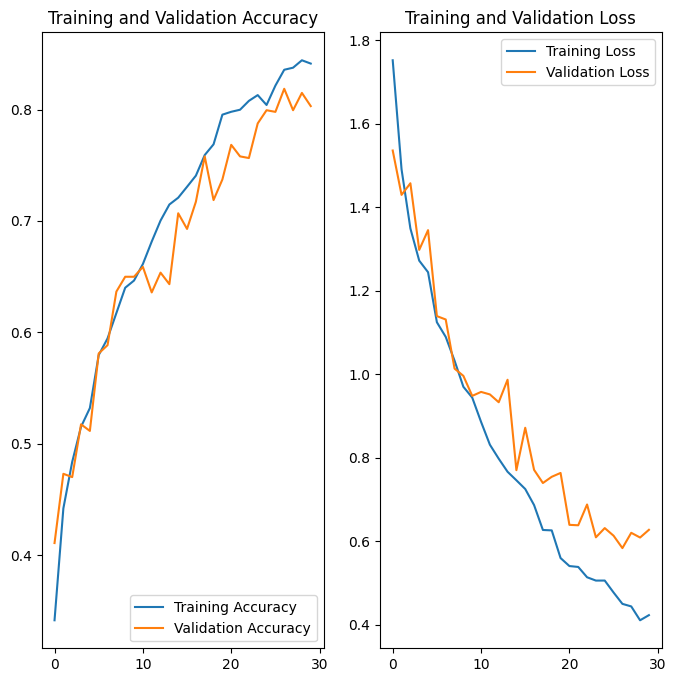

In [ ]:
# storing model accuracy in acc
acc = history.history['accuracy']
# storing model vavalidation accuracy in val_acc
val_acc = history.history['val_accuracy']
# storing the model loss in loss variable
loss = history.history['loss']
# storing validation loss of model in val_loss variable
val_loss = history.history['val_loss']

# taking the range using the epochs
epochs_range = range(epochs)

# setting the output figure size
plt.figure(figsize=(8, 8))
# plotting the training and validation accuracy in 1st plot
# setting the properties for the 1st image in the output image
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
# setting the legend possition in the image
plt.legend(loc='lower right')
# setting the image title
plt.title('Training and Validation Accuracy')

# plotting the training and validation loss in 2nd plot
# setting the properties for the 2nd image in the output image
plt.subplot(1, 2, 2)

plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
# setting the legend possition in the image
plt.legend(loc='upper right')
# setting the image title
plt.title('Training and Validation Loss')
# printing the plot
plt.show()

#### **Todo:**  Analyze your results here. Did you get rid of underfitting/overfitting? Did class rebalance help?

#### We can observe that the training and validation accuracy are following the same trend in both Accuracy & Loss
#### final model accuracy interms of training accuracy is 84% & validation accuracy is 80.31%
#### Based on the accuracy numbers, model does not show overfitting as there is not much difference between training and validation dataset. Also model doesnot show underfitting as the accuracy are quite high in both training and validation dataset. Class rebalance using augmentation have definiting helped to achieve better accuracy results for the model.


Analysis on Test Data

In [ ]:
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_test,
    seed = 123,
    image_size = (img_height,img_width),
    batch_size = batch_size
)

Found 118 files belonging to 9 classes.


In [ ]:
loss , accuracy = model.evaluate(test_ds)

4/4 [==============================] - 18s 80ms/step - loss: 5.3840 - accuracy: 0.3559


In [ ]:
print("Accuracy on test data ", accuracy)

Accuracy on test data  0.35593220591545105


Prediction on New Test Data

In [ ]:
melanoma_path = "/content/drive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Test/melanoma/ISIC_0000002.jpg"

img = tf.keras.utils.load_img(
    melanoma_path, target_size=(img_height, img_width)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(score)

1/1 [==============================] - 0s 229ms/step
tf.Tensor(
[1.1316767e-21 8.8474401e-12 1.1206330e-08 2.5209724e-06 9.9965334e-01
 3.4411045e-04 3.4184844e-18 4.3074643e-17 4.1759677e-27], shape=(9,), dtype=float32)


In [ ]:
print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(test_ds.class_names[np.argmax(score)], 100 * np.max(score))
)

This image most likely belongs to nevus with a 99.97 percent confidence.
